In [2]:
pip install brian2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.1 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 45.1 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 32.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.3 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 32.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 23.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 48.9 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 44.2 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


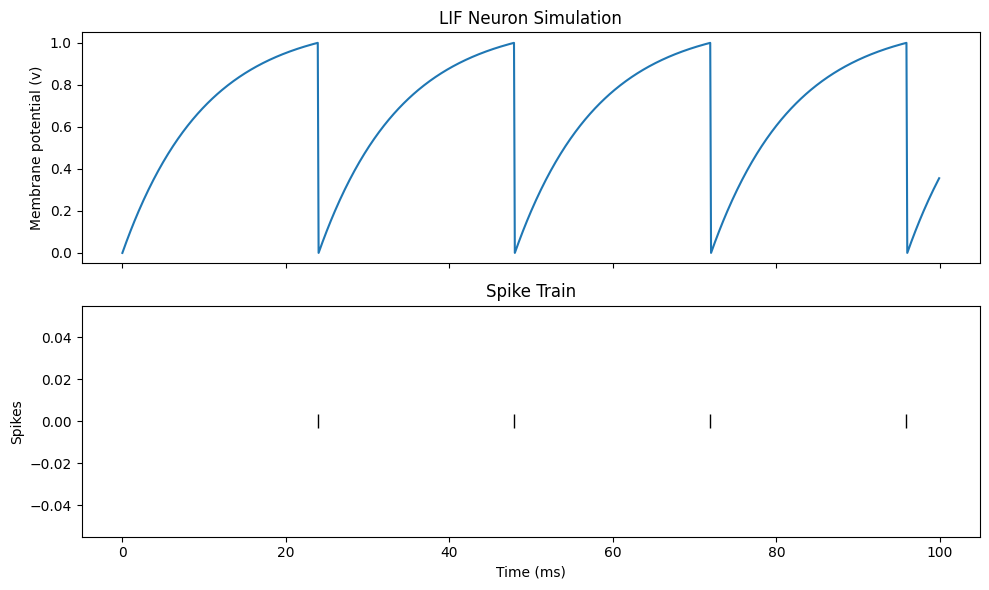

In [1]:
from brian2 import *
import matplotlib.pyplot as plt

start_scope()

# Parameters (unitless)
tau = 10*ms
eqs = '''
dv/dt = (1.1 - v)/tau : 1
'''

# LIF neuron group (with threshold and reset)
G = NeuronGroup(1, eqs, threshold='v > 1', reset='v = 0', method='exact')
G.v = 0  # başlangıç potansiyeli

# Save
M = StateMonitor(G, 'v', record=True)
spikes = SpikeMonitor(G)

# Run the simulation
run(100*ms)

# Draw a graph
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax[0].plot(M.t/ms, M.v[0])
ax[0].set_ylabel('Membrane potential (v)')
ax[0].set_title('LIF Neuron Simulation')

ax[1].plot(spikes.t/ms, spikes.i, 'k|', markersize=10)
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Spikes')
ax[1].set_title('Spike Train')

plt.tight_layout()
plt.show()


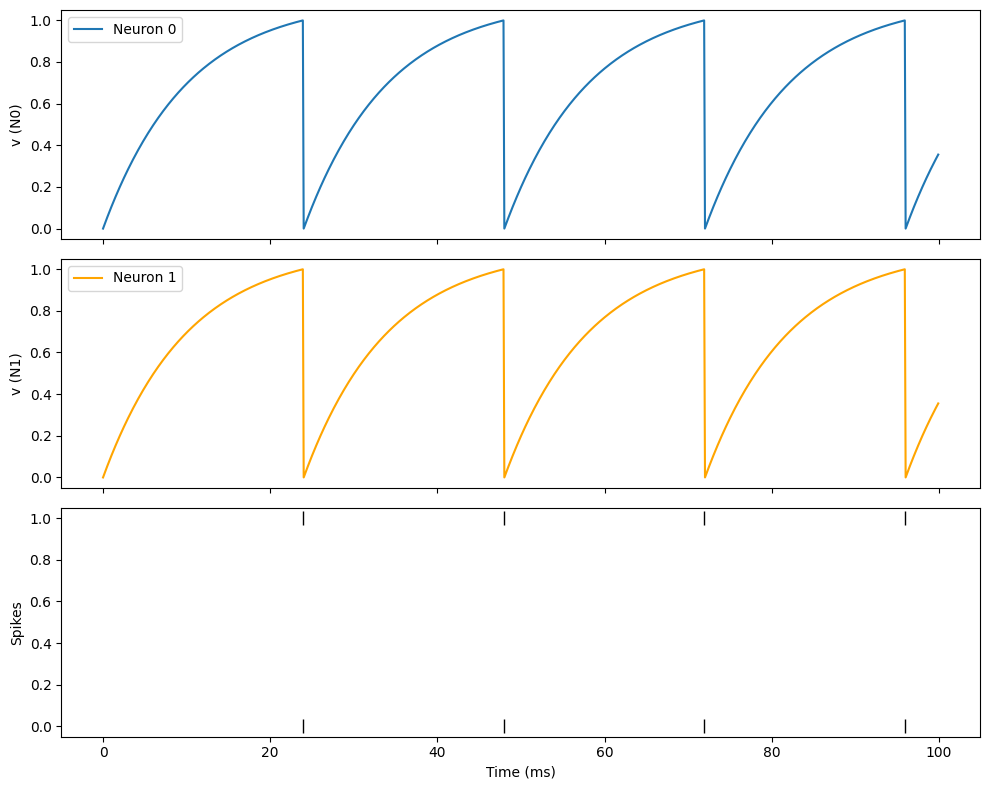

In [2]:
from brian2 import *
import matplotlib.pyplot as plt

start_scope()

# Parameters
tau = 10*ms
eqs = '''
dv/dt = (1.1 - v)/tau : 1
'''

# Group of 2 neurons
G = NeuronGroup(2, eqs, threshold='v > 1', reset='v = 0', method='exact')
G.v = [0, 0]  # İkisini de 0'dan başlat

# When there's a spike, let it affect the other neuron
S = Synapses(G, G, on_pre='v_post += 0.2')  # Add 0.2 to the target when the spike arrives
S.connect(i=0, j=1)  # connection only in the 0 → 1 direction

# Save
M = StateMonitor(G, 'v', record=True)
spikes = SpikeMonitor(G)

# Simulation
run(100*ms)

# Graphic
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

ax[0].plot(M.t/ms, M.v[0], label='Neuron 0')
ax[0].set_ylabel('v (N0)')
ax[0].legend()

ax[1].plot(M.t/ms, M.v[1], label='Neuron 1', color='orange')
ax[1].set_ylabel('v (N1)')
ax[1].legend()

ax[2].plot(spikes.t/ms, spikes.i, 'k|', markersize=10)
ax[2].set_xlabel('Time (ms)')
ax[2].set_ylabel('Spikes')

plt.tight_layout()
plt.show()
